#**EE769 Introduction to Machine Learning**

#Assignment 1: Gradient Descent, Linear Regression, and Regularization


**Template and Instructions**



1. Up to two people can team up, but only one should submit, and both should understand the entire code.
2. Every line of code should end in a comment explaining the line
3. It is recommended to solve the assignment in Google Colab.
Write your roll no.s separated by commas here: 
4. Write your names here: 
5. There are two parts to the assignment. In the Part 1, the code format has to be strictly followed to enable auto-grading. In the second part, you can be creative.
6. **You can discuss with other groups or refer to the internet without being penalized, but you cannot copy their code and modify it. Write every line of code and comment on your own.**

#**Part 1 begins ...**
**Instructions to be strictly followed:**

1. Do not add any code cells or markdown cells until the end of this part. Especially, do not change the blocks that say "TEST CASES, DO NOT CHANGE"
2. In all other cells only add code where it says "CODE HERE".
3. If you encounter any raise NotImplementedError() calls you may comment them out.

We cannot ensure correct grading if you change anything else, and you may be penalised for not following these instructions.

## Import Statements

In [158]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## Normalize function 



In [159]:
def Normalize(X): # Output should be a normalized data matrix of the same dimension
    '''
    Normalize all columns of X using mean and standard deviation
    '''
    '''
    Normalised X = (X - mean_µ)/ standard deviation_σ
    '''
  
    µ = X.mean(axis=0)
    σ = (np.abs(X).std(axis=0)) 
    z = (X - µ)/ σ

    return z    
    raise NotImplementedError()

In [160]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - 1 dimensional array'''
#X=np.array([[1,2,3],[3,4,5],[7,8,9]])
X1=np.array([1,2,3])
np.testing.assert_array_almost_equal(Normalize(X1),np.array([-1.224,  0.      ,  1.224]),decimal=3)
''' case 2 - 2 dimensional array'''
X2=np.array([[4,7,6],[3,8,9],[5,11,10]])
np.testing.assert_array_almost_equal(Normalize(X2),np.array([[ 0.  , -0.980581, -1.372813],[-1.224745, -0.392232,  0.392232],[ 1.224745,  1.372813,  0.980581]]))
''' case 3 - 1 dimensional array with float'''
X3=np.array([5.5,6.7,3.2,6.7])
np.testing.assert_array_almost_equal(Normalize(X3),np.array([-0.017,  0.822, -1.627,  0.822]),decimal=3)

## Prediction Function

Given X and w, compute the predicted output. Do not forget to add 1's in X

In [161]:
def Prediction (X, w): # Output should be a prediction vector y
    '''
    Compute Prediction given an input datamatrix X and weight vecor w. Output y = [X 1]w where 1 is a vector of all 1s 
    '''
    # YOUR CODE HERE
    
    ones = np.ones(len(X)) #get m number of 1's for m x n 2D array 
    X = np.c_[X,ones] #add the 1's to the last column of 2D array 
    y = (np.dot(X,w))
    
    return y #return the prediction vector y
    raise NotImplementedError()


In [162]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - Known input output matrix and weights 1'''
X1 = np.array([[3,2],[1,1]])
w1 = np.array([2,1,1]) 
np.testing.assert_array_equal(Prediction(X1,w1),np.array([9,4]))


## Loss Functions

Code the four  loss functions:

1. MSE loss is only for the error
2. MAE loss is only for the error
3. L2 loss is for MSE and L2 regularization, and can call MSE loss
4. L1 loss is for MSE and L1 regularization, and can call MSE loss

In [163]:
def MSE_Loss (X, t, w, lamda =0): # Ouput should be a single number
    '''
    lamda=0 is a default argument to prevent errors if you pass lamda to a function that doesn't need it by mistake. 
    This allows us to call all loss functions with the same input format.
    
    You are encouraged read about default arguments by yourself online if you're not familiar.
    '''
    # YOUR CODE HERE
    y = Prediction(X,w)
    sqr_error = ((y - t)) ** 2
    sum_of_sqr_error = np.sum(sqr_error)
    MSE_loss = sum_of_sqr_error / t.size
    
    
    return MSE_loss
    
    raise NotImplementedError()

In [164]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MSE_Loss(X,t,w),0.53,decimal=3)


In [165]:
def MAE_Loss (X, t, w, lamda = 0): # Output should be a single number
    # YOUR CODE HERE
    y = Prediction(X,w)
    abs_diff = np.abs(y-t)
    MAE_loss = np.mean(abs_diff)
    return MAE_loss
    raise NotImplementedError()

In [166]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MAE_Loss(X,t,w),0.700,decimal=3)


In [167]:
def L2_Loss (X, t, w, lamda): # Output should be a single number based on L2-norm (with sqrt)
    ''' Need to specify what inputs are'''
    # YOUR CODE HERE
    MSE = MSE_Loss(X,t,w)
    w_without_bias = w[:-1]
    l2norm = float(np.sqrt(np.sum(np.square(w_without_bias)))) # Finding L2 norm of the weight matrix
    return(MSE + (lamda*l2norm))
    raise NotImplementedError()

In [168]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L2_Loss(X,t,w,0.5),1.675,decimal=3)


In [169]:
def L1_Loss (X, t, w, lamda): # Output should be a single number
    # YOUR CODE HERE
    mes_loss = MSE_Loss (X, t, w, 0)
    
    w1 = np.abs(w)
    n = w1.size 
    sum_w1 = w1.sum()
    
    
    L1_loss = mes_loss + (sum_w1-w1[n-1])*lamda
    
    return (L1_loss)
    raise NotImplementedError()

In [170]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L1_Loss(X,t,w,0.5),2.280,decimal=3)


In [171]:
def NRMSE_Metric(X, t, w, lamda=0): # Output should be a single number. RMSE/std_dev(t)
    # YOUR CODE HERE
    y = Prediction (X, w)
    sum_of_sq_dif = sum((y - t)*(y - t))
    norm_sum_of_sq_dif = sum_of_sq_dif/t.size
    srt_norm_sum_of_sq_dif = norm_sum_of_sq_dif ** 0.5
    NRMSE = srt_norm_sum_of_sq_dif/np.std(t)
    return NRMSE
    
    raise NotImplementedError()

In [172]:
'''
TEST CASES, DO NOT CHANGE
'''
''' Test case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(NRMSE_Metric(X,t,w,0.5),0.970,decimal=3)


## Gradient function
Each Loss function will have its own gradient function:

1. MSE gradient is only for the error
2. MAE gradient is only for the error
3. L2 gradient is for MSE and L2 regularization, and can call MSE gradient
4. L1 gradient is for MSE and L1 regularization, and can call MSE gradient

In [173]:
def MSE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE
    Y = Prediction(X,w)
    
    
    Error = t - Y
    Neg_Error = -1*(Error.reshape(X.shape[0],1))
    
    ones = np.ones(len(X)) #get m number of 1's for m x n 2D array 
    X = np.c_[X,ones] #add the 1's to the last column of 2D array 

    MSE_Gradient = (Neg_Error*X).sum(axis = 0)
    
    return MSE_Gradient

    raise NotImplementedError()

In [174]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MSE_Gradient(X,t,w),np.array([2.55, 2.94, 2.9 , 0.4 ]),decimal=3)


In [175]:
def MAE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE

    n = t.size
    ones = np.ones(len(X)) #get m number of 1's for m x n 2D array 
    X1 = np.c_[X,ones] #add the 1's to the last column of 2D array 
    t1 = t.reshape(t.shape[0],1)
    w1 = w.reshape(w.shape[0],1)
    Term = (t1-X1.dot(w1))
    Temp = (np.where(Term>=0,X1,-X1))

    MAE_Gradient = np.sum((-1/n)* Temp, axis = 0)
    return(MAE_Gradient)
    
    raise NotImplementedError()

In [176]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MAE_Gradient(X,t,w),np.array([0.75,  0.3 ,  0.5 , 0.]),decimal=3)


In [177]:
def L2_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    Mse_gradient = MSE_Gradient (X, t, w, lamda=0)
    w1 = w[:-1]
    temp = (lamda/np.sqrt((np.square(w1)).sum()))*w1
    L2_gradient = Mse_gradient + (np.concatenate((temp, [0])))
    return(L2_gradient)

    raise NotImplementedError()

In [178]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(X,t,w,0.5),np.array([2.986, 2.721, 3.009 , 0.4 ]),decimal=3)


In [179]:
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    Mse_grad = MSE_Gradient (X, t, w, lamda=0)
    w_temp = w[0:len(w)-1]
    l1_grad = (np.where(w_temp>=0,lamda,-lamda)) 
    print(l1_grad)
    l1_grad = np.concatenate((l1_grad, [0]))

    return (Mse_grad+l1_grad)

    raise NotImplementedError()

In [180]:
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    MSE_gradient = MSE_Gradient (X, t, w, lamda=0)
    

    temp = np.concatenate(((np.where(w[:-1]>=0,lamda,-lamda)) , [0]))
    L1_gradient = MSE_gradient + temp

    return (L1_gradient)

    raise NotImplementedError()

In [181]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(X,t,w,0.5),np.array([3.05, 2.44, 3.4 , 0.4 ]),decimal=3)


## Gradient Descent Function


In [182]:
def Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement
    # YOUR CODE HERE
    dif = 100
    i = 0
    

    
    for i in range(max_iter):
        grad = gradfunc(X, t, w, lamda=lamda)
        w = (w - (lr*grad))
        
      
        
        
    validation_NRMSE_F = (NRMSE_Metric (X_val, t_val, w, lamda=0))
    validation_L_F = (MSE_Loss (X_val, t_val, w, lamda =0))
    train_L_F = (MSE_Loss (X, t, w, lamda =0))
    w_F = w 
      
    

  
       
    return (w_F, train_L_F, validation_L_F, validation_NRMSE_F) #You should return variables structured like this.
    raise NotImplementedError()
    

In [183]:
'''
TEST CASES, DO NOT CHANGE
'''
X=np.array([[23,24],[1,2]])
t=np.array([4,5])
X_val=np.array([[3,4],[5,6]])
t_val=np.array([3,4])
w=np.array([3,2,1])
results =Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient) 
np.testing.assert_allclose([results[1]],[697.919],rtol =0.05)
np.testing.assert_allclose([results[2]],[20],atol=5) # we expect around 17.5  but some students got 24 which we will also accept
#Instructor Values of results[1] and results [2] are 697.919 and 17.512 respectively

## Pseudo Inverse Method

You have to implement a slightly more advanced version, with L2 penalty:

w = (X' X + lambda I)^(-1) X' t.

See, for example: Section 2 of https://web.mit.edu/zoya/www/linearRegression.pdf

Here, the column of 1's in assumed to be included in X

In [184]:
def Pseudo_Inverse (X, t, lamda): # Output should be weight vector
    # YOUR CODE HERE
    
    n = t.size
    ones = np.ones(len(X)) #get m number of 1's for m x n 2D array 
    X1 = np.c_[X,ones] #add the 1's to the last column of 2D array
    w1 = w.reshape(w.shape[0],1)
    t1 = t.reshape(t.shape[0],1)
   
    I = np.identity(X1.shape[1])
    
    XT = np.transpose(X1)
    XT_X1 = (XT.dot(X1))
    Lam_Indentity = (lamda*I)
    
    Lin_Alg  = np.linalg.pinv(XT_X1 + Lam_Indentity )
    Pseudo_inverse = Lin_Alg.dot((XT).dot(t1)).flatten() 
    
    return Pseudo_inverse
    raise NotImplementedError()

In [185]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - other data'''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X,t,0.5),np.array([ 0.491,  0.183,  0.319, -0.002]),decimal=3)

#... Part 1 ends Below this you be more creative. Just comment out the lines where you save files (e.g. test predictions).

#**Part 2 begins ...**

**Instructions to be loosely followed (except number 8):**

1. Add more code and text cells between this and the last cell.
2. Read training data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv only. Do not use a local copy of the dataset.
3. Find the best lamda for **MSE+lamda*L2(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
4. Find the best lamda for **MSE+lamda*L1(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
5. Find the best lamda for the **pseudo-inv method**. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
6. Write your observations and conclusions.
7. Read test data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv only. Do not use a local copy of the dataset. Predict its dependent (missing last column) using the model with the lowest MSE, RMSE, or NRMSE. Save it as a file RollNo1_RollNo2_1.csv.
8. **Disable the prediction csv file saving statement and submit this entire .ipynb file, .py file, and .csv file as a single RollNo1_RollNo2_1.zip file.**


#**... Part 2 ends.**

1. Write the name or roll no.s of friends from outside your group with whom you discussed the assignment here (no penalty for mere discussion without copying code): 
2. Write the links of sources on the internet referred here (no penalty for mere consultation without copying code): 

In [186]:
dataset = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv')


In [187]:
dataset_1 = dataset
r = dataset.shape[0]
np.random.seed(101)
df_val = dataset.iloc[list(np.random.randint(r, size=int(r*0.2)))]
df = dataset.drop(list(np.random.randint(r, size=int(r*0.2))),axis=0)
t = df["Next_Tmax"].to_numpy()
t_val = df_val["Next_Tmax"].to_numpy()
X = Normalize(df.drop(["Next_Tmax"], axis=1).to_numpy())
X_val = Normalize(df_val.drop(["Next_Tmax"], axis=1).to_numpy())

In [157]:

Lamda_temp = np.array([1e-5,1e-4,1e-3,1e-2,1e-1,1e-0,1e+1,1e+2,1e+3,1e+4,1e+5])

val_NRMSE = []
train_RMSE = []
val_RMSE= []
w_pseudo_new = []

for lamda in Lamda_temp:
    w_pseudo = Pseudo_Inverse(X,t,lamda)
    train_RMSE.append(np.sqrt(MSE_Loss (X, t, w_pseudo, lamda =0))) 
    val_NRMSE.append(NRMSE_Metric(X_val, t_val, w_pseudo, lamda=0))
    val_RMSE.append(np.sqrt(MSE_Loss (X_val, t_val, w_pseudo, lamda =0)))
    w_pseudo_new.append(w_pseudo)



AttributeError: 'list' object has no attribute 'reshape'

In [45]:
Ind = val_RMSE.index(min(val_RMSE))
Lamda = Lamda_temp[Ind]
print("Lamda:", Lamda)
print("val_RMSE: ",min(val_RMSE))

Lamda: 10.0
val_RMSE:  1.4467290960989205


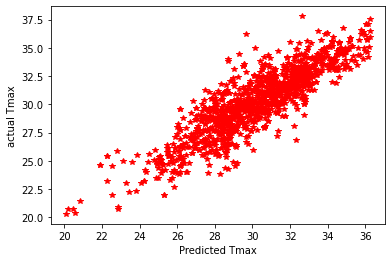

In [46]:
Ind = val_RMSE.index(min(val_RMSE))
Best_w = w_pseudo_new[Ind]
y_pred = Prediction(X_val,Best_w)
plt.plot(y_pred,t_val,'r*')
plt.xlabel("Predicted Tmax")
plt.ylabel("actual Tmax") 
plt.show()

## MSE+lamda*L1(w)


In [153]:
dataset_1 = dataset
r = dataset.shape[0]
np.random.seed(101)
df_val = dataset.iloc[list(np.random.randint(r, size=int(r*0.2)))]
df = dataset.drop(list(np.random.randint(r, size=int(r*0.2))),axis=0)

t = df["Next_Tmax"].to_numpy()
t_val = df_val["Next_Tmax"].to_numpy()
X = Normalize(df.drop(["Next_Tmax"], axis=1).to_numpy())
X_val = Normalize(df_val.drop(["Next_Tmax"], axis=1).to_numpy())

In [154]:
i=0
Lamda_temp = np.array([1e-5,1e-4,1e-3,1e-2,1e-1,1e-0,1e+1,1e+2,1e+3,1e+4,1e+5])
length = len(Lamda_temp)
specifications =['RMSE_for_training','RMSE_for_validation','w_for_L2','NRMSE_for_validation', "Lamda"]
specifications_df_temp = pd.DataFrame(columns=specifications)


while (i < length):
    w_result,t_final,vf,vn=Gradient_Descent(X,X_val,t,t_val,w,Lamda_temp[i], 10000, 1e-1, 0.00001,L2_Loss,L2_Gradient)
    specifications_df_temp = specifications_df_temp.append({'RMSE_for_training': t_final,'RMSE_for_validation': vf,'w_for_L2':w_result,'NRMSE_for_validation':vn, "Lamda": Lamda_temp[i]}, ignore_index=True)

    i = i +1


ValueError: shapes (4991,22) and (1,22) not aligned: 22 (dim 1) != 1 (dim 0)

In [148]:
min_val_rmse = specifications_df_temp['RMSE_for_validation'].min()
Index_min_val_rmse = specifications_df_temp[specifications_df_temp['RMSE_for_validation']==min_val_rmse].index.values
print("Lamda :", specifications_df_temp['Lamda'][Index_min_val_rmse].to_numpy())
specifications_df_temp['Lamda']
print("Validation RMSE :", min_val_rmse)

Lamda : [100.]
Validation RMSE : 2.092422056304974


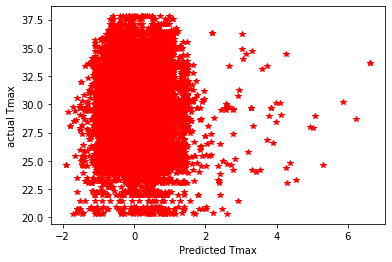

In [149]:


W =w = list(specifications_df_temp['w_for_L2'][Index_min_val_rmse].to_numpy().flat)
Best_w = Best_w[0]
y_pred = Prediction(X_val,Best_w)
plt.plot(y_pred,t_val,'r*')
plt.xlabel("Predicted Tmax")
plt.ylabel("actual Tmax") 
plt.show()

In [150]:
temp = list(specifications_df_temp['w_for_L2'][Index_min_val_rmse].to_numpy().flat)
b = np.reshape(temp, (np.product(temp.shape),))

AttributeError: 'list' object has no attribute 'shape'

In [137]:
w1 = np.array([2,1,1]) 

In [142]:
temp[0]

array([ 5.07769381e-01,  1.58061561e-01,  3.58961416e-01, -1.03450504e-01,
        1.75244669e+00,  2.42786069e-01, -3.96485286e-01,  2.58223973e-01,
       -3.12867063e-01, -2.03669357e-01, -1.55562145e-01, -2.40061131e-01,
       -6.59715009e-02,  1.71233503e-01, -1.78184528e-02, -2.31068132e-02,
       -5.07038833e-02, -1.32148057e-01, -2.20298388e-01,  2.84834380e-01,
        6.96641566e-02,  3.02623122e+01])

# 